<a href="https://colab.research.google.com/github/Aravind8281/Regression/blob/main/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

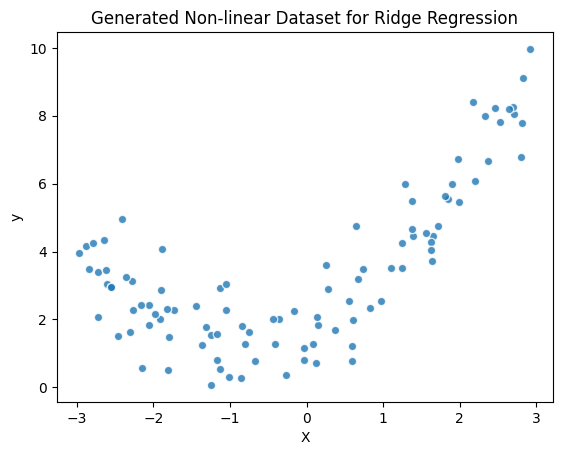

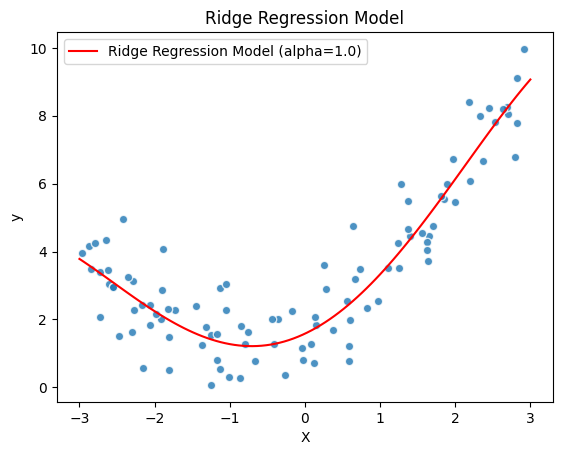

Mean Squared Error: 0.6806527059794882


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

# Visualize the dataset
plt.scatter(X, y, alpha=0.8, edgecolors='w')
plt.title('Generated Non-linear Dataset for Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Transform features to include polynomial terms up to degree 2
degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Apply Ridge regression with regularization parameter alpha
alpha = 1.0  # Adjust alpha based on the strength of regularization
ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Visualize the Ridge regression model
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_pred_new = ridge_model.predict(X_new_poly)

plt.scatter(X, y, alpha=0.8, edgecolors='w')
plt.plot(X_new, y_pred_new, 'r-', label=f'Ridge Regression Model (alpha={alpha})')
plt.title('Ridge Regression Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
